<a href="https://colab.research.google.com/github/shouvikpal8991/Assign2-computational/blob/main/Assig2_pr_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

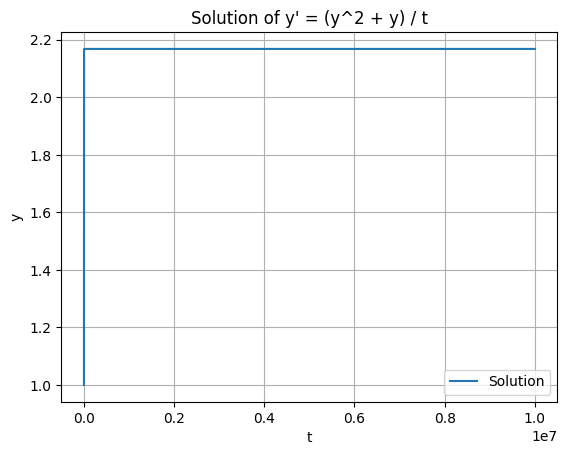

Value of y at t = 3.5e6: 2.1681049807442334


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return 1/(y**2 + t**2)

def runge_kutta_step(t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def adaptive_runge_kutta(t0, y0, h0, t_end, tol):
    t_values = [t0]
    y_values = [y0]
    h=h0
    while t0 < t_end:
        y1 = runge_kutta_step(t0, y0, 2*h)
        y2 = runge_kutta_step(t0, y0,  h)
        y2 = runge_kutta_step(t0 +  h, y2,  h)
        error = np.abs(y2 - y1)
        if error > 1e-10:  # Adjust the threshold value as needed
           rho = (tol * h * 30) / error
        else:
           rho = 1e6  # A large positive value to prevent division by zero

        if rho>1:
            t0 += 2*h
            y0 = y2
            t_values.append(t0)
            y_values.append(y0)
        else:
          h=h*(rho)**(0.25)

    return t_values, y_values


t_values, y_values = adaptive_runge_kutta(0, 1, 1.5, 10000000, 1e-2)

plt.plot(t_values, y_values, label='Solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of y\' = (y^2 + y) / t')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the solution at t = 3.5e6
t_target = 3.5e6
# Find the index of the closest time value in t_values
index_3_5e6 = np.argmin(np.abs(np.array(t_values) - t_target))
# Print the value of y at t = 3.5e6
print("Value of y at t = 3.5e6:", y_values[index_3_5e6])

